In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



In [10]:
netflix_data = r'C:\Users\Oluwatoyin\OneDrive - House on the Rock\Documents\NetflixOriginals.csv'

In [11]:
df = pd.read_csv(netflix_data)

In [12]:
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [13]:
print(list(df.columns))

['Title', 'Genre', 'Premiere', 'Runtime', 'IMDB Score', 'Language']


In [14]:
print("Number of rows: ", len(df))

Number of rows:  584


In [15]:
print(df.head())

             Title                  Genre           Premiere  Runtime  \
0  Enter the Anime            Documentary     August 5, 2019       58   
1      Dark Forces               Thriller    August 21, 2020       81   
2          The App  Science fiction/Drama  December 26, 2019       79   
3   The Open House        Horror thriller   January 19, 2018       94   
4      Kaali Khuhi                Mystery   October 30, 2020       90   

   IMDB Score          Language  
0         2.5  English/Japanese  
1         2.6           Spanish  
2         2.6           Italian  
3         3.2           English  
4         3.4             Hindi  


In [20]:
print(set(df['Runtime']))

{4, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 21, 23, 24, 25, 26, 27, 28, 30, 31, 32, 34, 36, 37, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 63, 64, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 142, 144, 147, 148, 149, 151, 153, 155, 209}


In [21]:
def return_statistics(data_frame, categorical_column, numerical_column):
    mean = []
    std = []
    field = []
    for i in set(list(data_frame[categorical_column].values)):
        new_data = data_frame[data_frame[categorical_column] == i]
        field.append(i)
        mean.append(new_data[numerical_column].mean())
        std.append(new_data[numerical_column].std())
    df = pd.DataFrame({'{}'.format(categorical_column): field, 'mean {}'.format(numerical_column): mean, 'std in {}'.format(numerical_column): std})
    df.sort_values('mean {}'.format(numerical_column), inplace = True, ascending = False)
    df.dropna(inplace = True)
    return df

In [22]:
stats = return_statistics(df, 'Genre', 'Runtime')
print(stats.head(15))

                     Genre  mean Runtime  std in Runtime
93               War drama    145.500000       13.435029
59  Psychological thriller    124.000000       17.048949
85            Spy thriller    122.000000       11.313708
98         Action-thriller    119.666667        6.110101
41             Crime drama    118.181818       32.263968
44          Musical comedy    117.500000        7.778175
11                 Western    116.666667       16.623277
39                 Musical    116.000000       22.627417
55                  Family    112.500000       14.849242
66         Science fiction    110.750000       21.061418
87                     War    110.500000        3.535534
68         Horror-thriller    109.500000       27.577164
35          Romantic drama    108.200000        6.140033
43                  Action    108.000000       26.312228
23                  Biopic    107.555556       13.258121


In [23]:
def get_boxplot_of_categories(data_frame, categorical_column, numerical_column, limit):
    import seaborn as sns
    from collections import Counter
    keys = []
    for i in dict(Counter(df[categorical_column].values).most_common(limit)):
        keys.append(i)
    print(keys)
    df_new = df[df[categorical_column].isin(keys)]
    sns.set()
    sns.boxplot(x = df_new[categorical_column], y =      df_new[numerical_column])

['Documentary', 'Drama', 'Comedy', 'Romantic comedy', 'Thriller']


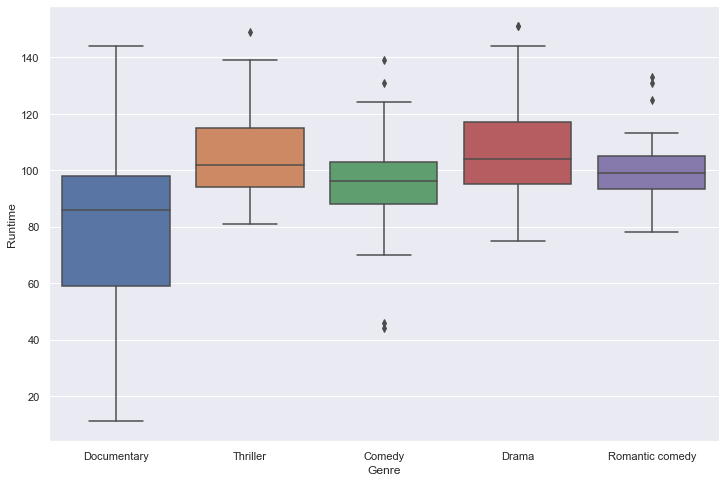

In [25]:
get_boxplot_of_categories(df, 'Genre', 'Runtime', 5)

In [26]:
def get_histogram(data_frame, numerical_column):
    df_new = data_frame
    df_new[numerical_column].hist(bins=100)

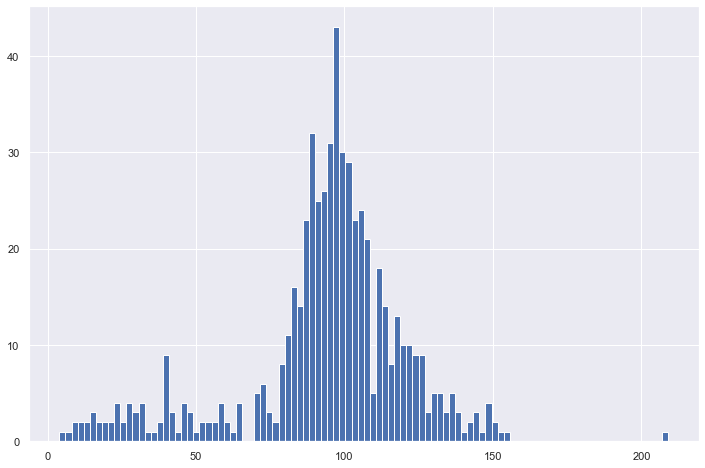

In [27]:
get_histogram(df, 'Runtime')

In [30]:
df['Year'] = df['Premiere'].astype(str).str[:4]
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Year
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,Augu
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,Augu
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,Dece
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,Janu
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,Octo
...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,Dece
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian,Octo
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,Dece
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese,Dece
